Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [21]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [22]:
data = pd.read_pickle("survey_transformed.pkl")

In [23]:
data.head()

,ANY,NOM_DISTRICTE,Would_not_stay_in_the_neighborhood,Gender,Time_living_in_barri,Barri_evolution,Barri_future,Barri_satisfaction_of_living,Barri_comparison,GARBAGE COLLECTION,...,Social_class,Living_alone,BCN_evolution,BCN_future,BCN_satisfaction_of_living,BCN_transport,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport
0,2007,CIUTAT VELLA,0.0,0,I HAVE ALWAYS LIVED IN THE CITY,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-LOW,0,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,GOOD,0,0,0,0
9,2007,CIUTAT VELLA,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-LOW,0,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,1
12,2007,CIUTAT VELLA,0.0,1,I HAVE ALWAYS LIVED IN THE CITY,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,ONE OF THE BEST,GOOD,...,MIDDLE-LOW,1,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,GOOD,0,0,0,0
14,2007,CIUTAT VELLA,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,SATISFIED,ONE OF THE BEST,GOOD,...,LOW,1,IT IS THE SAME,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,0
17,2007,CIUTAT VELLA,1.0,1,LESS THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,ONE OF THE WORST,GOOD,...,MIDDLE-MIDDLE,1,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,GOOD,0,0,0,0


In [24]:
data.shape

(6914, 34)

In [25]:
# Dataset is imbalanced
data.groupby(['Would_not_stay_in_the_neighborhood']).size()

Would_not_stay_in_the_neighborhood
0.0    6137
1.0     777
dtype: int64

In [26]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'Would_not_stay_in_the_neighborhood',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution',
 'Barri_future',
 'Barri_satisfaction_of_living',
 'Barri_comparison',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'FACADES AND BUILDING CONSERVATION',
 'CIRCULATION',
 'BUS',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITIZEN SECURITY IN THE NEIGHBORHOOD',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'Owns_a_car',
 'House_size',
 'Monthly_family_income',
 'Social_class',
 'Living_alone',
 'BCN_evolution',
 'BCN_future',
 'BCN_satisfaction_of_living',
 'BCN_transport',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport']

In [27]:
x_var = data.columns.tolist()

In [28]:
for i in ['ANY', 'Would_not_stay_in_the_neighborhood',
          'BCN_evolution', 'BCN_future', 'BCN_satisfaction_of_living', 'BCN_transport']:
    x_var.remove(i)

In [29]:
x = data[x_var]

In [30]:
y = data['Would_not_stay_in_the_neighborhood']

In [31]:
x = pd.get_dummies(x, drop_first = True)

In [32]:
x = sm.add_constant(x)

In [33]:
resampling = SMOTE(random_state=0)
columns = x.columns
x_resampled, y_resampled=resampling.fit_sample(x, y)
x_resampled = pd.DataFrame(data=x_resampled, columns=columns )
y_resampled = pd.DataFrame(data=y_resampled, columns=['Would_not_stay_in_the_neighborhood'])

print("length of oversampled data is ",len(x_resampled))
print("Number of people who would not stay in the neighborhood in resampled data",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==1]))
print("Number of people who would stay in the neighborhood in resampled data",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==0]))
print("Proportion of 'Would_not_stay_in_the_neighborhood' in resampled data is ",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==1])/len(x_resampled))
print("Proportion of subscription data in resampled data is ",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==0])/len(x_resampled))

length of oversampled data is  12274
Number of people who would not stay in the neighborhood in resampled data 6137
Number of people who would stay in the neighborhood in resampled data 6137
Proportion of 'Would_not_stay_in_the_neighborhood' in resampled data is  0.5
Proportion of subscription data in resampled data is  0.5


In [34]:
x_resampled

,const,Gender,Owns_a_car,Living_alone,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,NOM_DISTRICTE_EIXAMPLE,NOM_DISTRICTE_GRÀCIA,...,House_size_51-100 M2,House_size_< 50 M2,House_size_> 150 M2,Monthly_family_income_2001-3000 EUROS,Monthly_family_income_< 1000 EUROS,Monthly_family_income_> 3000 EUROS,Social_class_LOW,Social_class_MIDDLE-HIGH,Social_class_MIDDLE-LOW,Social_class_MIDDLE-MIDDLE
0,1.0,0,0.000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1.0,1,0.000000,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1.0,1,0.000000,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,1.0,1,0.000000,1,1,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,1.0,1,1.000000,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12269,1.0,1,0.616368,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
12270,1.0,0,0.000000,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
12271,1.0,0,0.000000,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
12272,1.0,0,0.000000,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [35]:
y_resampled['Would_not_stay_in_the_neighborhood'].unique()

array([0., 1.])

In [36]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.362039
         Iterations 8
                                       Results: Logit
Model:                   Logit                                 Pseudo R-squared:    0.478    
Dependent Variable:      Would_not_stay_in_the_neighborhood    AIC:                 8985.3395
Date:                    2021-04-23 08:13                      BIC:                 9348.6862
No. Observations:        12274                                 Log-Likelihood:      -4443.7  
Df Model:                48                                    LL-Null:             -8507.7  
Df Residuals:            12225                                 LLR p-value:         0.0000   
Converged:               1.0000                                Scale:               1.0000   
No. Iterations:          8.0000                                                              
--------------------------------------------------------------------------------------------

In [37]:
result.pvalues.sort_values(ascending=False)

Barri_comparison_ONE OF THE WORST                8.992543e-01
CITIZEN SECURITY IN THE NEIGHBORHOOD_GOOD        6.225015e-01
ASPHALT AND STREET CONSERVATION_GOOD             6.012104e-01
House_size_> 150 M2                              5.069659e-01
CIRCULATION_GOOD                                 4.114187e-01
MUNICIPAL MARKETS_GOOD                           4.043771e-01
FACADES AND BUILDING CONSERVATION_GOOD           3.793693e-01
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD     1.861743e-01
Time_living_in_barri_MORE THAN 10 YEARS          1.794856e-01
BUS_GOOD                                         1.346189e-01
GREEN AREAS_GOOD                                 1.242506e-01
Living_alone                                     7.513463e-02
GARBAGE COLLECTION_GOOD                          6.295577e-02
Owns_a_car                                       3.392167e-02
Time_living_in_barri_LESS THAN 10 YEARS          2.230834e-03
Monthly_family_income_> 3000 EUROS               5.638481e-04
STREETS 

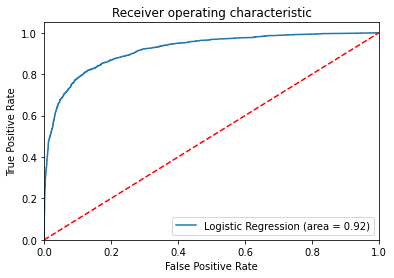

In [38]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
# NIE POPRAWIŁAM PONIŻSZEGO FEATURE SELECTION

In [20]:
for i in ['MUNICIPAL POLICE_GOOD', 'CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD', 'BCN_over_barri_future', 
          'Gender', 'Barri_transport_GOOD']:
    del x_resampled[i]

In [21]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.433186
         Iterations 7
                                      Results: Logit
Model:                  Logit                                Pseudo R-squared:   0.375    
Dependent Variable:     Would_not_stay_in_the_neighborhood   AIC:                6975.6630
Date:                   2021-04-16 07:55                     BIC:                7282.8238
No. Observations:       7950                                 Log-Likelihood:     -3443.8  
Df Model:               43                                   LL-Null:            -5510.5  
Df Residuals:           7906                                 LLR p-value:        0.0000   
Converged:              1.0000                               Scale:              1.0000   
No. Iterations:         7.0000                                                            
------------------------------------------------------------------------------------------
                          

In [22]:
result.pvalues.sort_values(ascending=False)

Living_alone                                  4.203236e-02
House_size_> 150 M2                           2.328316e-02
ASPHALT AND STREET CONSERVATION_GOOD          2.286665e-02
GREEN AREAS_GOOD                              2.155480e-02
Barri_transport_NORMAL                        1.538595e-02
House_size_< 50 M2                            8.304233e-03
STREETS CLEANING_GOOD                         7.380443e-03
Monthly_family_income_> 3000 EUROS            4.512150e-03
Barri_satisfaction_of_living_SATISFIED        1.943124e-03
CIRCULATION_GOOD                              7.542893e-04
PUBLIC LIGHTING_GOOD                          6.461190e-04
BUS_GOOD                                      4.827889e-04
BCN_over_barri_transport                      1.491051e-04
Barri_comparison_ONE OF THE WORST             1.389451e-04
Social_class_MIDDLE-MIDDLE                    1.235845e-04
Barri_evolution_IT IS THE SAME                8.382358e-05
Social_class_MIDDLE-HIGH                      4.810323e-

In [23]:
print(result.get_margeff().summary())

                Logit Marginal Effects               
Dep. Variable:     Would_not_stay_in_the_neighborhood
Method:                                          dydx
At:                                           overall
                                               dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Owns_a_car                                    0.0612      0.010      6.176      0.000       0.042       0.081
Living_alone                                  0.0227      0.011      2.035      0.042       0.001       0.045
BCN_over_barri_evolution                     -0.1012      0.017     -6.025      0.000      -0.134      -0.068
BCN_over_barri_satisfaction_of_living         0.1105      0.021      5.383      0.000       0.070       0.151
BCN_over_barri_transport                      0.0581      0.015      3.805      0.000       0.028       0.088
NOM_DISTRICTE_

In [24]:
result.pred_table()

array([[3159.,  816.],
       [ 812., 3163.]])

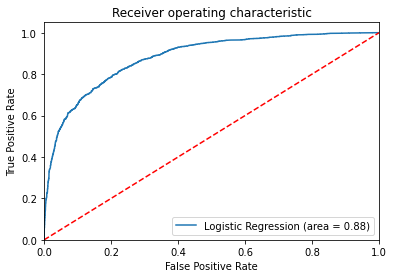

In [25]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()